In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import tensorflow as tf
np.random.seed(seed=0)

/Users/hbae/opt/anaconda3/lib/python3.8/site-packages/h5py/__init__.py:72: UserWarning: h5py is running against HDF5 1.10.4 when it was built against 1.8.4, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [5]:
!rm ./books-eng_segment/.DS_STORE
books_path = "./eng_segment/"
new_path = "../"
books_list = sorted(os.listdir(books_path))

documents = list()

for i in books_list:
    f = open(books_path + i, 'r')
    doc = list(map(lambda x: x.replace("\n", ""), f.readlines()))
    doc = [x.replace("</s>", " </s>")[:-5] for x in doc]
    documents.append(doc)


    f.close()

rm: ./books-eng_segment/.DS_STORE: No such file or directory


In [6]:
# 전체 세그먼트 포함하는 리스트
doc_total = list()
for doc in documents:
    doc_total.extend(doc)

In [7]:
text_len = [len(s.split()) for s in doc_total]
seg_len = [len(s) for s in documents]

In [8]:
np.min(text_len)

2

In [9]:
np.max(seg_len)

129

텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 41130
텍스트의 평균 길이 : 1099.7085352359877


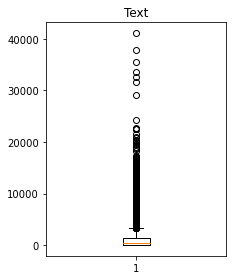

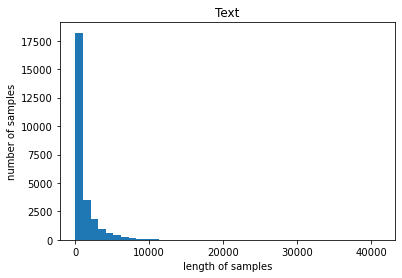

In [10]:
print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [11]:
text_max_len = 512

텍스트의 최소 길이 : 6
텍스트의 최대 길이 : 129
텍스트의 평균 길이 : 34.44021024967149


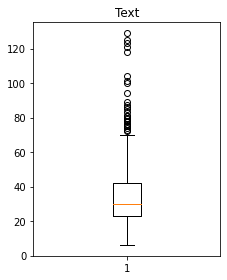

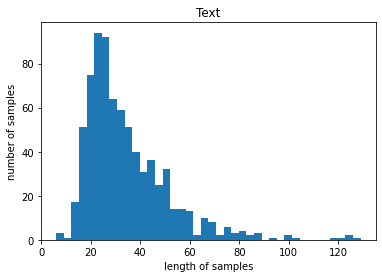

In [12]:
print('텍스트의 최소 길이 : {}'.format(np.min(seg_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(seg_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(seg_len)))

plt.subplot(1,2,1)
plt.boxplot(seg_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(seg_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [13]:
seg_max_len = 30

In [14]:
encoder_input = documents

In [15]:
decoder_input = list()
for doc in encoder_input:
    tmp = list()
    for x in doc:
        x = 'sostoken ' + x
        tmp.append(x)
    decoder_input.append(tmp)
    
decoder_target = list()
for doc in encoder_input:
    tmp = list()
    for x in doc:
        x = x + ' eostoken'
        tmp.append(x)
    decoder_target.append(tmp)

In [16]:
encoder_input = np.array(encoder_input)
decoder_input = np.array(decoder_input)
decoder_target = np.array(decoder_target)

<ipython-input-16-9c07af7f6dda>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  encoder_input = np.array(encoder_input)
<ipython-input-16-9c07af7f6dda>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  decoder_input = np.array(decoder_input)
<ipython-input-16-9c07af7f6dda>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  decoder_target

In [17]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

[621 350 518  40 263 390 402 241  31 367  27 549 495  14 648 344 142 676
 657 333 655 615 503 251 532 673 210  55 400 692  79 603 460 457 406 568
 644 352   8 145 501 418 399 327 654 243 271 175 267 441   1 299 542 162
 658 415  75 649 732 613 230 592 573 548 122 351 312 588 506 620 193 584
 181 103 301 380 247 758 579  85 310 578 294 747 338  18 407 582 283 701
 240  50 268 113 710 150  39 731 556 413  10  68 156 463 172 738   2 754
 364 252 196 346 474 636 214 720 704 239 358 253 409 689 715 466 374 682
 187 231  71  49 279 424 744  37 447  48 293 730 386 204 668  76  64 671
  52 306 412 471 313 516 536 485 157 118 242 198 222 302 315  97 526 540
 618 520 258 593 266  17 628 362 236 523 360 699 235 170 686 334  45 317
  62 753 202 522 272 140 734 558 127 531 427 478 144 395  21 605 401  35
 468 249 417  77 366 250 752 109 759 521 101 422 255 477 215 458 499 331
 363 750 278 211 303 165 188 382 652  34 743 700 757 755 467 632 155 451
 355 354 319 200  66 702 601 404  12 161 434 285 75

In [18]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 152


In [19]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [20]:
print(len(encoder_input_train))
print(len(decoder_input_train))
print(len(decoder_target_train))

609
609
609


In [21]:
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 609
훈련 레이블의 개수 : 609
테스트 데이터의 개수 : 152
테스트 레이블의 개수 : 152


In [22]:
encoder_total = list()
for doc in encoder_input_train:
    encoder_total.extend(doc)

In [23]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_total)

In [24]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1221363
등장 빈도가 6번 이하인 희귀 단어의 수: 1120168
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 101195
단어 집합에서 희귀 단어의 비율: 91.71458444377306
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.239944382070146


In [25]:
src_vocab = 120000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_total)

In [26]:
embeded_encoder_input_train = list()
for doc in encoder_input_train:
    doc = src_tokenizer.texts_to_sequences(doc)
    embeded_encoder_input_train.append(doc)
encoder_input_train = embeded_encoder_input_train

embeded_encoder_input_test = list()
for doc in encoder_input_test:
    doc = src_tokenizer.texts_to_sequences(doc)
    embeded_encoder_input_test.append(doc)
encoder_input_test = embeded_encoder_input_test

In [27]:
decoder_total = list()
for doc in decoder_input_train:
    decoder_total.extend(doc)
for doc in decoder_target_train:
    decoder_total.extend(doc)

In [28]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_total)

In [29]:
tar_tokenizer.word_index

{'s': 1,
 'wa': 2,
 'said': 3,
 'one': 4,
 'would': 5,
 'mr': 6,
 'man': 7,
 'could': 8,
 'time': 9,
 'ha': 10,
 'little': 11,
 'like': 12,
 'know': 13,
 'upon': 14,
 'see': 15,
 'well': 16,
 'come': 17,
 'say': 18,
 'go': 19,
 'day': 20,
 'u': 21,
 'much': 22,
 'made': 23,
 'hand': 24,
 'must': 25,
 'two': 26,
 'thing': 27,
 'good': 28,
 'think': 29,
 'way': 30,
 'old': 31,
 'may': 32,
 'never': 33,
 'great': 34,
 'men': 35,
 'came': 36,
 'make': 37,
 'back': 38,
 'might': 39,
 'eye': 40,
 'life': 41,
 'first': 42,
 'dont': 43,
 'thought': 44,
 'long': 45,
 'even': 46,
 'away': 47,
 'went': 48,
 'take': 49,
 'shall': 50,
 'still': 51,
 'last': 52,
 'though': 53,
 'face': 54,
 'get': 55,
 'yet': 56,
 'look': 57,
 'tell': 58,
 'place': 59,
 'young': 60,
 'woman': 61,
 'nothing': 62,
 'word': 63,
 'without': 64,
 'head': 65,
 'every': 66,
 'let': 67,
 'sir': 68,
 'many': 69,
 'people': 70,
 'year': 71,
 'ever': 72,
 'mind': 73,
 'right': 74,
 'lady': 75,
 'give': 76,
 'house': 77,
 'foun

In [30]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1221365
등장 빈도가 5번 이하인 희귀 단어의 수: 1002849
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 218516
단어 집합에서 희귀 단어의 비율: 82.10886999381839
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.138533796216538


In [31]:
tar_vocab = 220000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_total)

In [32]:
embeded_decoder_input_train = list()
for doc in decoder_input_train:
    doc = tar_tokenizer.texts_to_sequences(doc)
    embeded_decoder_input_train.append(doc)
decoder_input_train = embeded_decoder_input_train

embeded_decoder_input_test = list()
for doc in decoder_input_test:
    doc = tar_tokenizer.texts_to_sequences(doc)
    embeded_decoder_input_test.append(doc)
decoder_input_test = embeded_decoder_input_test

embeded_decoder_target_train = list()
for doc in decoder_target_train:
    doc = tar_tokenizer.texts_to_sequences(doc)
    embeded_decoder_target_train.append(doc)
decoder_target_train = embeded_decoder_target_train

embeded_decoder_target_test = list()
for doc in decoder_target_test:
    doc = tar_tokenizer.texts_to_sequences(doc)
    embeded_decoder_target_test.append(doc)
decoder_target_test = embeded_decoder_target_test

In [33]:
drop_train = [index for index, sentence in enumerate(doc) for doc in decoder_input_train if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(doc) for doc in decoder_input_test if len(sentence) == 1]

In [34]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

/Users/hbae/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


훈련 데이터의 개수 : 609
훈련 레이블의 개수 : 609
테스트 데이터의 개수 : 152
테스트 레이블의 개수 : 152


In [35]:
padded_sent_encoder_input_train = list()
for doc in encoder_input_train:
    doc = pad_sequences(doc, maxlen = text_max_len, padding='post')
    padded_sent_encoder_input_train.append(doc)
encoder_input_train = padded_sent_encoder_input_train

padded_sent_encoder_input_test = list()
for doc in encoder_input_test:
    doc = pad_sequences(doc, maxlen = text_max_len, padding='post')
    padded_sent_encoder_input_test.append(doc)
encoder_input_test = padded_sent_encoder_input_test

padded_sent_decoder_input_train = list()
for doc in decoder_input_train:
    doc = pad_sequences(doc, maxlen = text_max_len, padding='post')
    padded_sent_decoder_input_train.append(doc)
decoder_input_train = padded_sent_decoder_input_train

padded_sent_decoder_target_train = list()
for doc in decoder_target_train:
    doc = pad_sequences(doc, maxlen = text_max_len, padding='post')
    padded_sent_decoder_target_train.append(doc)
decoder_target_train = padded_sent_decoder_target_train

padded_sent_decoder_input_test = list()
for doc in decoder_input_test:
    doc = pad_sequences(doc, maxlen = text_max_len, padding='post')
    padded_sent_decoder_input_test.append(doc)
decoder_input_test = padded_sent_decoder_input_test

padded_sent_decoder_target_test = list()
for doc in decoder_target_test:
    doc = pad_sequences(doc, maxlen = text_max_len, padding='post')
    padded_sent_decoder_target_test.append(doc)
decoder_target_test = padded_sent_decoder_target_test

In [36]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = seg_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = seg_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = seg_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = seg_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = seg_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = seg_max_len, padding='post')

# 최대 segment 개수만큼 input 리스트 만들기(일단 4개로 함)

In [37]:
encoder_input_train1 = list()
encoder_input_train2 = list()
encoder_input_train3 = list()
encoder_input_train4 = list()

for i, book in enumerate(encoder_input_train):
    encoder_input_train1.append(encoder_input_train[i][0]) # i번째 책의 첫번째 문장
    encoder_input_train2.append(encoder_input_train[i][1]) # i번째 책의 두번째 문장
    encoder_input_train3.append(encoder_input_train[i][2]) # i번째 책의 세번째 문장
    encoder_input_train4.append(encoder_input_train[i][3]) # i번째 책의 네번째 문장
    
encoder_input_train1 = np.array(encoder_input_train1)
encoder_input_train2 = np.array(encoder_input_train2)
encoder_input_train3 = np.array(encoder_input_train3)
encoder_input_train4 = np.array(encoder_input_train4)

In [38]:
encoder_input_test1 = list()
encoder_input_test2 = list()
encoder_input_test3 = list()
encoder_input_test4 = list()

for i, book in enumerate(encoder_input_test):
    encoder_input_test1.append(encoder_input_test[i][0]) # i번째 책의 첫번째 문장
    encoder_input_test2.append(encoder_input_test[i][1]) # i번째 책의 두번째 문장
    encoder_input_test3.append(encoder_input_test[i][2]) # i번째 책의 세번째 문장
    encoder_input_test4.append(encoder_input_test[i][3]) # i번째 책의 네번째 문장
    
encoder_input_test1 = np.array(encoder_input_test1)
encoder_input_test2 = np.array(encoder_input_test2)
encoder_input_test3 = np.array(encoder_input_test3)
encoder_input_test4 = np.array(encoder_input_test4)

In [39]:
decoder_input_train1 = list()
decoder_input_train2 = list()
decoder_input_train3 = list()
decoder_input_train4 = list()

for i, book in enumerate(decoder_input_train):
    decoder_input_train1.append(decoder_input_train[i][0]) # i번째 책의 첫번째 문장
    decoder_input_train2.append(decoder_input_train[i][1]) # i번째 책의 두번째 문장
    decoder_input_train3.append(decoder_input_train[i][2]) # i번째 책의 세번째 문장
    decoder_input_train4.append(decoder_input_train[i][3]) # i번째 책의 네번째 문장
    
decoder_input_train1 = np.array(decoder_input_train1)
decoder_input_train2 = np.array(decoder_input_train2)
decoder_input_train3 = np.array(decoder_input_train3)
decoder_input_train4 = np.array(decoder_input_train4)

In [40]:
decoder_input_test1 = list()
decoder_input_test2 = list()
decoder_input_test3 = list()
decoder_input_test4 = list()

for i, book in enumerate(decoder_input_test):
    decoder_input_test1.append(decoder_input_test[i][0]) # i번째 책의 첫번째 문장
    decoder_input_test2.append(decoder_input_test[i][1]) # i번째 책의 두번째 문장
    decoder_input_test3.append(decoder_input_test[i][2]) # i번째 책의 세번째 문장
    decoder_input_test4.append(decoder_input_test[i][3]) # i번째 책의 네번째 문장
    
decoder_input_test1 = np.array(decoder_input_test1)
decoder_input_test2 = np.array(decoder_input_test2)
decoder_input_test3 = np.array(decoder_input_test3)
decoder_input_test4 = np.array(decoder_input_test4)

In [41]:
decoder_target_train1 = list()
decoder_target_train2 = list()
decoder_target_train3 = list()
decoder_target_train4 = list()

for i, book in enumerate(decoder_target_train):
    decoder_target_train1.append(decoder_target_train[i][0]) # i번째 책의 첫번째 문장
    decoder_target_train2.append(decoder_target_train[i][1]) # i번째 책의 두번째 문장
    decoder_target_train3.append(decoder_target_train[i][2]) # i번째 책의 세번째 문장
    decoder_target_train4.append(decoder_target_train[i][3]) # i번째 책의 네번째 문장
    
decoder_target_train1 = np.array(decoder_target_train1)
decoder_target_train2 = np.array(decoder_target_train2)
decoder_target_train3 = np.array(decoder_target_train3)
decoder_target_train4 = np.array(decoder_target_train4)

In [42]:
decoder_target_test1 = list()
decoder_target_test2 = list()
decoder_target_test3 = list()
decoder_target_test4 = list()

for i, book in enumerate(decoder_target_test):
    decoder_target_test1.append(decoder_target_test[i][0]) # i번째 책의 첫번째 문장
    decoder_target_test2.append(decoder_target_test[i][1]) # i번째 책의 두번째 문장
    decoder_target_test3.append(decoder_target_test[i][2]) # i번째 책의 세번째 문장
    decoder_target_test4.append(decoder_target_test[i][3]) # i번째 책의 네번째 문장
    
decoder_target_test1 = np.array(decoder_target_test1)
decoder_target_test2 = np.array(decoder_target_test2)
decoder_target_test3 = np.array(decoder_target_test3)
decoder_target_test4 = np.array(decoder_target_test4)

# 모델 선언

In [43]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, Average
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.backend import mean


In [44]:
embedding_dim = 128
hidden_size = 256

In [45]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [46]:
def autoencoder(hidden_size, text_max_len, src_vocab, tar_vocab, embedding_dim, name='autoencoder'):

    """
    첫번째 문장
    """
    encoder_inputs1 = Input(shape=(text_max_len, ))
    print(encoder_inputs1)
    # 인코더의 임베딩 층
    enc_emb1 = Embedding(src_vocab, embedding_dim)(encoder_inputs1)
    # 인코더의 LSTM 1
    encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
    encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb1)

    """
    두번째 문장
    """
    encoder_inputs2 = Input(shape=(text_max_len, ))
    # 인코더의 임베딩 층
    enc_emb2 = Embedding(src_vocab, embedding_dim)(encoder_inputs2)
    # 인코더의 LSTM 2
    encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
    encoder_output2, state_h2, state_c2 = encoder_lstm2(enc_emb2)

    """
    세번째 문장
    """
    encoder_inputs3 = Input(shape=(text_max_len, ))
    # 인코더의 임베딩 층
    enc_emb3 = Embedding(src_vocab, embedding_dim)(encoder_inputs3)
    # 인코더의 LSTM 3
    encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
    encoder_output3, state_h3, state_c3 = encoder_lstm3(enc_emb3)
    
    
    """
    네번째 문장
    """
    encoder_inputs4 = Input(shape=(text_max_len, ))
    # 인코더의 임베딩 층
    enc_emb4 = Embedding(src_vocab, embedding_dim)(encoder_inputs4)
    # 인코더의 LSTM 3
    encoder_lstm4 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
    encoder_output4, state_h4, state_c4 = encoder_lstm4(enc_emb4)

    state_h = tf.keras.layers.Average()([state_h1, state_h2, state_h3, state_h4])
    state_c = tf.keras.layers.Average()([state_c1, state_c2, state_c3, state_c4])
    encoder_outputs = tf.keras.layers.Average()([encoder_output1, encoder_output2, encoder_output3, encoder_output4])
    #state_h = tf.reduce_mean([state_h1, state_h2, state_h3, state_h4], 0)

    """
    디코더
    """
    decoder_inputs = Input(shape=(None,))
    # 디코더의 임베딩 층
    dec_emb_layer = Embedding(tar_vocab, embedding_dim)
    dec_emb = dec_emb_layer(decoder_inputs) # 일단 책의 첫 문장 넣기 

    # 디코더의 LSTM
    decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
    decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])
    
    # 디코더의 출력층
    decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
    decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

    #return Model(inputs = [encoder_outputs, state_h, state_c, decoder_inputs], outputs = decoder_softmax_outputs)
    
    return Model([encoder_inputs1, encoder_inputs2, encoder_inputs3, encoder_inputs4, decoder_inputs], outputs = decoder_softmax_outputs)

In [47]:
"""
첫번째 문장
"""
encoder_inputs1 = Input(shape=(text_max_len, ))
print(encoder_inputs1)
# 인코더의 임베딩 층
enc_emb1 = Embedding(src_vocab, embedding_dim)(encoder_inputs1)
# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb1)

"""
두번째 문장
"""
encoder_inputs2 = Input(shape=(text_max_len, ))
# 인코더의 임베딩 층
enc_emb2 = Embedding(src_vocab, embedding_dim)(encoder_inputs2)
# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(enc_emb2)

"""
세번째 문장
"""
encoder_inputs3 = Input(shape=(text_max_len, ))
# 인코더의 임베딩 층
enc_emb3 = Embedding(src_vocab, embedding_dim)(encoder_inputs3)
# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(enc_emb3)


"""
네번째 문장
"""
encoder_inputs4 = Input(shape=(text_max_len, ))
# 인코더의 임베딩 층
enc_emb4 = Embedding(src_vocab, embedding_dim)(encoder_inputs4)
# 인코더의 LSTM 3
encoder_lstm4 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output4, state_h4, state_c4 = encoder_lstm4(enc_emb4)

state_h = tf.keras.layers.Average()([state_h1, state_h2, state_h3, state_h4])
state_c = tf.keras.layers.Average()([state_c1, state_c2, state_c3, state_c4])
encoder_outputs = tf.keras.layers.Average()([encoder_output1, encoder_output2, encoder_output3, encoder_output4])
#state_h = tf.reduce_mean([state_h1, state_h2, state_h3, state_h4], 0)

"""
디코더
"""
decoder_inputs = Input(shape=(None,))
# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs) # 일단 책의 첫 문장 넣기 

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 


KerasTensor(type_spec=TensorSpec(shape=(None, 512), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [48]:
#model = autoencoder(hidden_size, text_max_len, src_vocab, tar_vocab, embedding_dim, name='autoencoder')
model = Model([encoder_inputs1, encoder_inputs2, encoder_inputs3, encoder_inputs4, decoder_inputs], outputs = decoder_softmax_outputs)

In [49]:
def accuracy(y_true, y_pred):
    # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
    y_true = tf.reshape(y_true, shape=(-1, text_max_len))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=[accuracy])

In [50]:
#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [51]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train1, encoder_input_train2, encoder_input_train3, encoder_input_train4, decoder_input_train1], y = decoder_target_train1, \
          validation_data = ([encoder_input_test1, encoder_input_test2, encoder_input_test3, encoder_input_test4, decoder_input_test1], decoder_target_test1),
          batch_size =4, epochs = 50)

Epoch 1/50
153/153 [==============================] - 8077s 53s/step - loss: 5.4172 - accuracy: 0.4776 - val_loss: 4.6016 - val_accuracy: 0.5202
Epoch 2/50
153/153 [==============================] - 7405s 48s/step - loss: 4.5245 - accuracy: 0.5216 - val_loss: 4.5718 - val_accuracy: 0.5215
Epoch 3/50
153/153 [==============================] - 7772s 51s/step - loss: 4.4834 - accuracy: 0.5219 - val_loss: 4.5914 - val_accuracy: 0.5212
Epoch 4/50
152/153 [============================>.] - ETA: 47s - loss: 4.4409 - accuracy: 0.5227 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/hbae/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-84e7659127a3>", line 2, in <module>
    history = model.fit(x = [encoder_input_train1, encoder_input_train2, encoder_input_train3, encoder_input_train4, decoder_input_train1], y = decoder_target_train1, \
  File "/Users/hbae/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py", line 1183, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/hbae/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 889, in __call__
    result = self._call(*args, **kwds)
  File "/Users/hbae/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py", line 917, in _call
    return self._stateless_fn(*args, **kwds)  # pylint: disable=not-callable
  File "/Users/hbae/opt/a

TypeError: object of type 'NoneType' has no len()

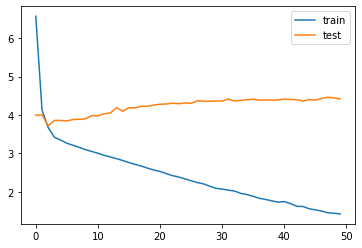

In [50]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [51]:
print("Evaluate on test data")
results = model.evaluate([encoder_input_test1, encoder_input_test2, encoder_input_test3, encoder_input_test4, decoder_input_test1], decoder_target_test1)
print("test loss, test acc:", results)

Evaluate on test data
1/1 [==============================] - 23s 23s/step - loss: 4.4209 - accuracy: 0.6454
test loss, test acc: [4.4208903312683105, 0.6454321146011353]


In [52]:
results

[4.4208903312683105, 0.6454321146011353]

In [53]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [54]:
encoder_model = Model([encoder_inputs1, encoder_inputs2, encoder_inputs3, encoder_inputs4], [state_h, state_c, encoder_outputs])

In [55]:
#encoder_model = test_encoder(hidden_size, text_max_len, src_vocab, embedding_dim)

In [56]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)


# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [57]:
# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [58]:
def decode_sequence(input_seq1, input_seq2, input_seq3, input_seq4):
    # 입력으로부터 인코더의 상태를 얻음
    e_h, e_c, e_out = encoder_model.predict([input_seq1, input_seq2, input_seq3, input_seq4])

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]
        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (text_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence


In [59]:
def seq2text(input_seq1, input_seq2, input_seq3, input_seq4):
    temp1=''
    for i in input_seq1:
        if(i!=0):
            temp1 = temp1 + src_index_to_word[i]+' '
    
    temp2=''
    for i in input_seq2:
        if(i!=0):
            temp2 = temp2 + src_index_to_word[i]+' '
            
    temp3=''
    for i in input_seq3:
        if(i!=0):
            temp3 = temp3 + src_index_to_word[i]+' '
            
    temp4=''
    for i in input_seq4:
        if(i!=0):
            temp4 = temp4 + src_index_to_word[i]+' '
    
    return temp1, temp2, temp3, temp4

In [60]:
for i in range(len(encoder_input_test)):
    print("원문 : ",seq2text(encoder_input_test1[i], encoder_input_test2[i], encoder_input_test3[i], encoder_input_test4[i]))
    print("예측 :",decode_sequence(encoder_input_test1[i].reshape(1, text_max_len), encoder_input_test2[i].reshape(1, text_max_len), encoder_input_test3[i].reshape(1, text_max_len), encoder_input_test4[i].reshape(1, text_max_len)))
    print("\n")


원문 :  ('자 그럼 처음부터 찬찬히 s 거짓말은 하지 않는 편이 좋아 s 우린 벌 써 다 알고 있으니까 ', '이미 으니 한 이야기지만 하도 애원을 하니까 한 번 더 들어 봐 준다는 그런 s 제가 왜 무엇 때문에 합니까 s 정말 s 제가 한 말 은 다 사 s 없읍니다 ', '책상 모서리에 놓인 나무 걸상에 두 무릎을 모으고 단정하게 앉은 새끼 손가락을 하나 세우고 그 새까만 손톱을 가리켜 보이며 울상을 지었다 s 글세 그러니까 한 번 더 얘기해 보라는 거 아냐 s 담배를 붙여 물며 맞은편 벽에 걸린 시계를 쳐다보았다 ', '뻔한 사건을 빨리 끝내 버리고 싶은 그런 눈치였다 s 나 정말 s 정말 ')
예측 :  이렇게 좀 말했다 그리고 나는 좀 누가 거 나는 나는 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 좀 좀 좀 물론 물론 물론 물론 물론 물론 물론 오늘 오늘 내가 내가 물론 그는 내가 내가 알 있었다 있었다 있었다 다 내가 내가 그가 그가 그가 그가 알 없다 다 다 다 그러나 그러나 좀 알 없었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 물론 물론 그러나 그러나 물론 없다 다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 물론 그가 그러나 그가 그가 그가 그가 그가 그가 그러나 데 데 이렇게 그러나 그러나 데 하며 이렇게 큰 그러나 그러나 데 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 위에 듯이 듯이 듯이 아무 아무 아무 아무 아무 아무 아무


원문 :  ('당시의 왕은 헨리 s 헨리 헨리 ', '일찍이 것들은 이제 s 사제는 토끼 사냥에 바쁘고 순례를 팔아 샀다 s 살찐 수도사들은 외면하고 영역 복음서를 몰래 읽는 백 성서의 진리를 껍데기 를 교회의 종소리는 헛되이 울리고 먼지 낀 공기의 진동에 불과하였다 s 불신과 송두리째 뒤 흔들리는 교회를 지킬 유일한 s 영역 돌아온 일하 던 손을 멈추고 멍하니 생각에 잠겼다 ', '희미한

예측 :  이렇게 좀 말했다 그리고 나는 좀 누가 거 나는 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 물론 물론 물론 물론 물론 물론 오늘 내가 내가 그가 그가 물론 없다 있었다 있었다 다 내가 내가 그가 그가 그가 물론 없다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 그가 알 다 다 다 다 다 그러나 그러나 그가 알 그가 그러나 없었다 있었다 다 다 그러나 그러나 그가 그가 그가 물론 물론 그러나 그러나 물론 물론 그러나 그러나 그가 그가 그가 그러나 그러나 하며 하며 하며 큰 큰 그러나 그러나 데 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 위에 듯이 듯이 듯이 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무


원문 :  ('바다가 길이 드러난다 s 오후 사라질 잠시 동안의 길이 ', '나는 처음인 듯 한동안 조심스레 길 위로 차를 몰았다 s 물이 나간 자리에 남은 자갈들이 는 소리가 울렸다 s 낡은 차는 금방이라도 설 듯 용케 좁은 시멘트 길을 따라 굴러간다 s 한 대 느릿느릿 다가왔다 s 차 옆 을 지나칠 때 위의 남자가 손을 내저으며 휘익 휘파람을 불 었다 s 사내의 검은 머리가 휘파람을 타고 나부꼈다 s 길은 비어 있었지만 내게는 길 위에 파도가 그대로 덮여 있 는 것처럼 보였다 s 그 파도가 지나간 자리에 남겨진 낡은 배의 바닥을 늙은 어부의 군인들이 술 취해 부르던 노 섬 구석구석 깔린 부서진 하얀 영상과 차례로 눈앞에 떠올랐다 s 그 사이 바뀐 계절 탓인가 섬은 지난번 보았을 때와는 어딘가 다르게 느껴졌다 s 계절 s 나는 빈 돌아다보며 남은 길을 천천히 따라갔다 s 길이 다하는 곳에 서 있는 검은 된 집 s 먼지 낀 유리 너머로 사내 하나가 흘낏 고개를 들고 나를 보았다 s 한 장을 내밀고 나는 사내의 손에 들린 표를 넘겨 받았다 ', '자연을 s 이곳 s 희끄무레한 섬의 

예측 :  이렇게 그러나 그러나 데 데 이렇게 그러나 그러나 적이 데 그러나 그러나 적이 바로 그러나 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 오늘 오늘 좀 좀 그가 그가 그가 물론 물론 내가 내가 물론 없다 있었다 있었다 다 그러나 그러나 그가 그가 그가 물론 없다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 물론 없다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 물론 물론 그러나 그러나 물론 없다 다 다 다 다 그러나 그러나 하는 그가 그러나 그가 그가 그가 그가 그가 그가 그가 이렇게 그러나 그러나 데 하며 데 데 그러나 그러나 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 위에 듯이 위에 듯이 아무 아무 아무


원문 :  ('여러 겹 주름이 잡힌 훌렁 벗겨진 숱이 적어서 법대로 쪽 틀어 못하고 엉성하게 그냥 뒤 염소 똥만 하게 붙은 것이라든지 벌써 늙어가는 자취를 감출 길이 없었다 s 뾰족한 입을 너머로 쌀쌀한 눈이 때엔 오싹하고 그는 매서웠다 ', '사연을 보는 족족 그는 더할 수 없이 얼굴이 붉으락푸르락 편지 든 손이 발발 성을 낸다 s 아마 까닭 없이 그런 편지를 받은 큰 ', '하기가 무섭게 그 학생은 간다 s 분해서 못 견디겠다 는 사람 모양으로 방안을 왔다갔다 하던 그는 들어오는 학생을 잡아먹을 듯이 한 걸음 두 걸음 코가 만큼 바싹 딱 ', '하고 묻는다 s 그래 불렀다 ')
예측 :  말했다 그리고 그 좀 이렇게 누가 누가 나는 나는 좀 좀 다른 다른 나는 나는 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 물론 물론 물론 물론 물론 물론 물론 오늘 내가 내가 물론 그는 내가 내가 알 있었다 있었다 있었다 다 내가 내가 그가 그가 그가 그가 물론 없다 있었다 다 다 그러나 그러나 좀 그가 없었다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 그가

예측 :  이렇게 좀 말했다 그리고 나는 좀 누가 거 나는 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 물론 물론 물론 물론 물론 물론 오늘 내가 내가 그가 물론 없다 있었다 있었다 다 내가 내가 그가 그가 그가 물론 없다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 그가 알 다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 그가 알 다 다 다 다 다 그러나 그러나 그가 그가 그가 물론 물론 그러나 그러나 물론 그가 그러나 그러나 그가 그가 그러나 이렇게 데 그러나 그러나 하며 하며 하며 큰 큰 이렇게 이렇게 그러나 그러나 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 위에 듯이 듯이 듯이 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무


원문 :  ('수학 담당 교실로 들어갔다 s 학생들은 그의 손에 책이 들려 있 지 않은 것을 보았다 s 학생들은 교사를 s 이 학교에서 학생들 이 신뢰하는 유일한 ', '그가 입을 열었다 s 지난 고생 많았다 s 정말 모두 공부해 주었다 s 그래서 이 마지막 입학 시험과 상관이 없는 이야기를 하고 싶었다 s 나는 몇 권의 책을 보다가 함께 이야기해 보고 싶은 것을 발견했다 s 일단 내가 묻는 형식을 ', '두 아이가 굴 뚝 청소를 했다 s 한 아이가 얼굴이 새까맣게 되어 또 한 아 이는 전혀 않은 깨끗한 얼굴로 내려왔다 s 어 느 쪽의 아이가 얼굴을 씻을 것이라고 생각하는가 ', '아무도 얼른 대답을 하지 못했다 s 잠시 후에 한 학생이 일어섰다 s 얼굴이 더러운 아이가 얼굴을 씻을 것입니다 s 그런데 그렇지가 않다 s 말했다 s 왜 그렇습니까 s 다른 학생이 물었다 s 교사는 말했다 ')
예측 :  이렇게 좀 말했다 그리고 나는 좀 누가 거 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 물론 물론 물론 물론 물론 오늘 내가 좀 그는 물론 내가 내가 알 있었다

In [61]:
for i in range(len(encoder_input_train)):
    print("원문 : ",seq2text(encoder_input_train1[i], encoder_input_train2[i], encoder_input_train3[i], encoder_input_train4[i]))
    print("예측 :",decode_sequence(encoder_input_train1[i].reshape(1, text_max_len), encoder_input_train2[i].reshape(1, text_max_len), encoder_input_train3[i].reshape(1, text_max_len), encoder_input_train4[i].reshape(1, text_max_len)))
    print("\n")


원문 :  ('진수가 돌아온다 s 진수가 살아서 돌아온다 s 아무개는 전사했다는 통지 가 왔고 아무개는 죽었는지 살았는지 통 소식이 없는데 우리 진수는 살아서 오늘 돌아오는 것이다 s 생각할수록 어깻바람이 날 일이다 s 그 래 그런지 몰라도 박만도는 여느때 같으면 아무래도 한두 군데 앉아 쉬어야 넘어설 수 있는 용머리재를 단숨에 올라채고 만 것이다 s 가슴 이 펄럭거리고 허벅지가 뻐근했다 ', '그러나 그는 고갯마루에서도 쉴 생 각을 하지 않았다 s 들 건너 멀리 바라보이는 정거장에서 연기가 물씬 물씬 피어오르며 삐익 기적 소리가 들려 왔기 때문이다 s 아들이 타고 내려올 기차는 점심때가 가까워 도착한다는 것을 모르는 바 아니다 s 해가 이제 겨우 산등성이 위로 한 뼘 가량 떠올랐으니 오정이 되려면 아직 차례 멀은 것이다 s 그러나 그는 공연히 마음이 바빴다 s 까짓것 잠시 앉아 쉬면 뭐할 기고 ', '손가락으로 한쪽 콧구멍을 누르면서 팽 s 마른 코를 풀어 던졌다 s 그 리고 휘청휘청 고갯길을 내려가는 것이다 s 내리막은 오르막에 비하면 아무것도 아니었다 s 대고 팔을 흔들라치면 절로 굴러 내려가는 것이다 s 만도는 오른쪽 팔만을 앞뒤로 흔들고 있 었다 s 왼쪽 팔은 조끼 주머니에 아무렇게나 쑤셔 넣고 있는 것이다 ', '삼대 독자가 죽다니 말이 되나 s 살아서 돌아와야 일이 옳고말고 s 그런 데 병원에서 나온다하니 어디를 좀 다치기는 다친 모양이지만 설마 나같이 이렇게사 되지 않았겠지 ')
예측 :  말했다 그리고 나는 좀 이렇게 누가 누가 나는 나는 좀 좀 다른 좀 나는 나는 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 좀 좀 번 물론 물론 물론 물론 물론 물론 물론 오늘 내가 내가 물론 그는 내가 내가 알 있었다 있었다 있었다 다 내가 내가 그가 그가 그가 그가 알 없다 다 다 다 그러나 그러나 좀 알 없었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 물론 물론 그러나 그러나 물론 없다 다 다 다 다 다 그러나 그러나 그가 그가 그가 물론 그가 그러나 

예측 :  말했다 그러나 그러나 좀 데 그러나 그러나 데 데 그러나 다른 그러나 그러나 좀 하며 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 좀 좀 물론 물론 오늘 내가 내가 물론 물론 내가 내가 물론 없다 있었다 있었다 다 그러나 그러나 그가 그가 물론 물론 그러나 그러나 물론 없다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 없다 있었다 다 다 다 다 그러나 그러나 그가 그가 그가 물론 물론 그러나 그러나 물론 없다 다 다 다 다 그러나 그러나 그가 그가 그가 물론 그가 그러나 그가 그가 그가 그가 그러나 그러나 적이 밤 그러나 그러나 데 하며 큰 큰 그러나 그러나 데 하며 큰 큰 그가 그러나 데 하며 데 큰 데 그가 그가 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데


원문 :  ('가하 오빠 s 부호라는 걸 만든 이에게 평안 있으라 s 엉망진창이 된 나의 감 정을 감정의 뉘앙스라는 점에서는 완전히 인연 없는 의사 전달 수단으로써 표현할 수 있는 이 신기함이여 s 그렇지만 고향의 누이는 꽃봉투 속에 든 전문 축 순산을 읽을 게 아니냐고 ', '맙쇼 s 어깨 한 번 으쓱하면 다 통해 버리는 감정표시를 양영화에서 나 는 좀 더 먼저 배운걸 s 김형 s 우리는 취하기 위해서 세상에 태어난 게 아닐까요 s 그렇지만 자 칭 소설가라는 그 작자는 술에 취해서 벌개진 얼굴을 제법 심각하게 찌그러뜨려 가지고 허지만 형씨 우리는 그리워하기 위해서 태어난 게 아닐까요 ', '그렇게 대답하며 이 작자는 자기의 턱에 듬성듬성 난 수염을 손으로 슬슬 쓰다듬기까지 한다 s 그러나 작자에 대해서라면 내가 잘 알고 있다 s 그럴 리는 없지만 만약 제게서 치기가 조금이라도 엿보인다면 그건 제가 사랑하던 여 자를 잃고나서부터 일겁니다 s 라고 작자는 얘기하고 있지만 천만에 s 작자가 치한이 된 것은 아주 오래 전부터 어쩌면 태어날 때부 터였다고 생각된다 s 천부의 성격이라고나 할까 s 그런데 작자는 사랑 어쩌고 하면서 

예측 :  나는 없었다 그리고 그 좀 사람들이 이렇게 나는 좀 고개를 다른 나는 나는 고개를 고개를 좀 좀 좀 좀 좀 다른 고개를 그의 그의 고개를 고개를 그의 그의 속에서 없다 저 좀 사람들이 고개를 좀 고개를 고개를 고개를 고개를 고개를 고개를 없이 없이 없이 고개를 이렇게 그러나 없었다 있었다 다 그러나 그러나 고개를 고개를 없었다 다 그러나 그러나 그가 고개를 그가 그러나 이렇게 없다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 그가 고개를 고개를 그러나 그러나 고개를 없다 다 다 다 다 그러나 그러나 그가 고개를 그가 그러나 그가 고개를 고개를 그러나 그러나 고개를 고개를 그러나 그러나 고개를 고개를 그러나 그러나 고개를 하며 그러나 이렇게 하며 이렇게 하며 그러나 고개를 하며 그러나 고개를 하며 그러나 고개를 하며 이렇게 데 이렇게 하며 고개를 하며 큰 데 그러나 속에서 하며 고개를 데 그가 데 데 고개를 데 그가 데 속에서 데 데 속에서 데 그가 데 데 하며


원문 :  ('오월의 어느 날 저녁이었다 s 맏딸이 또 밤 열두 시에 돌아온대서 벌써 부터 기다리고들 있었다 s 서성대는 사람은 없으나 언제나처럼 누구인 가를 기다리고 있는 분위기는 감돌고 있었다 s 은행 두취로 있다가 현역에서 은퇴하고 명예역으로 이름만 걸어 놓고 있는지금도 거기에서 매달 들어오는 수입으로 한 달 살림은 넉넉했 다 ', '칠십이 넘은 주인은 연한 남색 명주옷을 단정하게 입고 응접실 소파에 기대어 앉아 있었다 s 단정하게 입긴 입었으나 어쩐지 헐렁헐렁 해 보이고 축 늘어진 앉음새는 속이 허하여 혼자 힘으로 일어설 힘조 차 없을 것처럼 보였다 s 귀가 멀고 반백치였다 s 그러나 허연 살결의 넓적한 얼굴은 훨씬 젊어 보이고 서양 사람의 풍격을 느끼게 하였다 s 며느리 정애와 막내딸 영희가 옆자리에 앉아 있었다 s 며느 리의 한복 차림을 싫어하는 왕년의 시아버지의 뜻대로 정애는 봄 스 웨터에 통이 좁은 까만 바지 차림이고 영희는 원피스를 입고 있었다 s 며느리와 시누이는 사

예측 :  그러나 그러나 사람들이 사람은 없었다 그리고 나는 정말 사람들이 다른 나는 나는 사람들이 몸을 나는 다른 몸을 나는 다른 몸을 나는 좀 몸을 다른 다른 그의 그의 속에서 속에서 몸을 몸을 몸을 몸을 몸을 몸을 몸을 몸을 몸을 속에서 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 아무 듯이 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무


원문 :  ('학교 강당 뒤편 으슥한 곳에 끌려가 머리에 털 나고 처음인 그런 무 서운 린치를 당했다 s 끽소리 한 번 못한 채 고스란히 당해야만 했다 s 설사 소리를 내질렀다고 하더라도 누구 한 사람 쫓아와 그 공포로부 터 나를 건져 올리지 못했을 것이다 s 토요일 늦은 오후였고 도서실에 서 강당까지 끌려가는 동안 나는 교정에 단 한 사람도 얼씬거리는 걸 보지 못했다 ', '더우기 강당은 본관에서 운동장을 가로질러 아주 까마이 득 멀리 떨어져 있었다 s 재수파들은 모두 일곱 명이었다 s 그들 은 무언극을 하듯 말을 아꼈다 s 그러나 민첩하고 분명하게 움직였다 s 기표가 웃옷을 벗어 던진 다음 바른손에 거머쥐고 있던 사이다 병을 담벽에 깼다 s 깨어져 나간 사이다 병의 날카로운 유리조각이 그의 걷 어올린 팔뚝에 사악사악 그어 갔다 s 금간 살갗에서 검붉은 피가 꽃망 울처럼 터져 올랐다 s 기표가 그 팔뚝을 내 눈앞에 들이댔다 s 핥아 s 기 표 아닌 다른 애가 말했다 s 내가 고개를 옆으로 비키자 곁에 둘러선 서너 명의 구두 끝이 정강이에

예측 :  이렇게 그러나 이렇게 데 이렇게 그러나 그러나 적이 데 그러나 그러나 좀 그러나 그러나 좀 않고 좀 적이 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 좀 좀 오늘 오늘 것이 좀 내가 그가 그가 적이 없다 있었다 있었다 다 그러나 그러나 그가 그가 그가 그가 물론 없다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 그가 물론 없다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 물론 없다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 물론 물론 그러나 그러나 그가 그가 그가 그가 그가 그러나 그러나 데 하며 이렇게 이렇게 그러나 그러나 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 위에 듯이 위에 듯이 아무 아무 아무 아무


원문 :  ('친애하는 동생 k야 s 간번 너의 편지는 반갑게 받아 읽었다 s 그리고 약해졌던 너의 몸도 다 소 튼튼해짐을 알았다 s 기쁘다 ', '무어니무어니해도 건강밖에 더 있느냐 s k야 졸업기를 앞둔 너는 기쁨보다도 괴롬이 앞서고 희망보다는 낙망 을 하게 된다고 s 오냐 네 환경이 그러하니만큼 응당 그러하리라 s 그러 나 너는 그 괴롬과 낙망 가운데서 당연히 깨달음이 있어야 한다 ', 'k야 네가 물은 바 이 언니의 연애관과 내지 결혼관은 간단하게 문장 으로 표현할 만한 지식이 아직도 나는 부족하구나 s 그러니 나는 요새 내가 지내는 생활 전부와 그 생활로부터 일어나는 나의 감정 전부를 아무 꾸밀 줄 모르는 서투른 문장으로 적어 놀 터이니 현명한 너는 거기서 버릴 것은 버리고 취하여 다고 s k야 내가 요새 d신문에 장편소설을 연재하여 원고료 이백여 원을 받 은 것은 너도 잘 알지 ', '그것이 내 일생을 통하여 처음으로 많이 가져 보는 돈이구나 s 그러니 내 머리는 갑자기 활기를 얻어 공상을 다하게 되더구나 ')
예측 :  말했다 그리고 그 좀 이렇게

예측 :  이렇게 그러나 이렇게 데 그러나 그러나 적이 데 그러나 그러나 적이 바로 그러나 그러나 좀 않고 좀 않고 좀 적이 좀 좀 좀 좀 좀 좀 좀 웃었다 물론 좀 좀 물론 물론 오늘 오늘 것이 내가 좀 그가 물론 물론 내가 그러나 물론 없다 있었다 있었다 다 그러나 그러나 그가 그가 그가 그가 물론 없다 있었다 다 다 다 그러나 그러나 그가 그가 그가 그가 그가 알 다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 물론 물론 그러나 그러나 그가 그가 그가 그러나 그가 더 그러나 그러나 데 하며 더 이렇게 그러나 그러나 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 위에 듯이 위에 듯이 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무


원문 :  ('그는 방금 거리에서 돌아왔다 s 너무 피로해서 쓰러져 버릴 것 같았다 s 그는 아파트 계단을 천천히 올라서 자기 방까지 왔다 s 그는 운수 좋게 도 방까지 오는 동안 아무도 만나지 못했었고 아파트 복도에도 사람 은 없었다 s 어디선가 시금치 끓이는 냄새가 나고 있었다 ', '그는 방문을 더듬어 문 앞에 프레스라고 쓰인 신문 투입구 안쪽의 초인종을 가볍 게 두어 번 눌렀다 s 그리고 이미 갈라진 혓바닥에 아린 감각만을 주어 오던 담배꽁초를 잘 닦아 반들거리는 복도에 던져 버렸다 s 그는 아주 참을성 있게 기다리고 있었다 ', '그의 아내가 문을 열어 주기를 s 문을 열고 다소 호들갑을 떨며 눈을 동그랗게 뜨고 자기를 맞아주기를 s 그 러나 귀를 기울이고 마지막 남은 담배에 불을 당기었는데도 방 안쪽 에서는 소식이 없었다 ', '그는 다시 그 작은 철제 아가리 속에 손을 넣 어 탄력감 있는 초인종을 신경질적으로 누르기 시작했다 s 손끝에 가벼 운 경련이 일었다 s 그리고 그는 또 기다리기 시작했다 ')
예측 :  이렇게 좀 말했다 그리고 나는 좀 누가

예측 :  말했다 그리고 그 좀 이렇게 누가 누가 나는 나는 좀 좀 다른 다른 나는 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 번 물론 물론 물론 물론 물론 물론 물론 오늘 내가 내가 물론 그는 내가 내가 알 있었다 있었다 있었다 다 내가 내가 그가 그가 그가 그가 알 없다 다 다 다 그러나 그러나 좀 그가 없었다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 그가 물론 물론 그러나 그러나 물론 없다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 그가 그가 그가 그가 그가 그러나 그러나 적이 데 그러나 그러나 데 하며 이렇게 큰 그러나 그러나 데 하며 큰 큰 이렇게 그러나 그러나 웃었다 하며 그가 큰 데 그가 그가 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데


원문 :  ('박살이 난 사단의 생존자일 것이다 s 그처럼 잡 다한 옷차림의 보병이 칙칙한 옷을 입은 포병과 함께 가고 있는가 하 면 용기병의 번쩍거리는 철모가 하나 갑자기 떠올라 보일 적 도 있었다 s 행군에 익숙한 보병 뒤를 쫓아가노라니 무척 힘에 겨운 모 양으로 무거운 다리를 질질 끌고 있었다 s 의용군 부대도 후퇴하고 있었다 s 구국의 부대라느니 결사대라느니 혈맹단이라느니 이름만은 용감하지만 보는 바에 의하면 비적 떼와 다름없다 s 그 부대장이라는 것도 얼마 전까지는 포목장수였거나 씨앗장수 기 름장수 비누장사였던 자들로서 시절을 만나 군인이 되고 장교로 임명 됐지만 그것은 오직 돈푼이 있거나 수염이 길어서였을 것이다 s 그런 자가 일단 긴 칼을 차고 견장을 달고 군복 차림으로 몸을 굳 히게 되면 쩡쩡 울리는 목소리로 지껄여대거나 전략을 논하거나 한다 s 그리고 자기네들이야말로 패전한 프랑스의 운명을 양어깨에 짊어졌노 라고 큰소리를 친다 s 그러면서도 그들은 부하 병사들을 겁내고 있다 s 물불 가리지 않는 만용도 보이지만 부하란 자들이 하나같이 극악무도 한 놈들이라 남의 물건을 약탈하는 것쯤이야 예사로 생각하기 때문이 다 ',

예측 :  더 아 아 그러나 없었다 그리고 할 모든 그가 그가 그가 그가 데 데 데 데 데 데 그가 그가 데 데 데 데 데 데 데 말했다 두 그가 데 말했다 을 어떻게 속에서 속에서 속에서 속에서 속에서 오늘 그가 그가 속에서 데 데 하며 데 하며 데 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 듯이 아무 듯이 아무 듯이 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무


원문 :  ('그것은 여가 만주를 여행할 때 일이었다 s 만주의 풍속도 좀 살필 겸 아직껏 문명의 세례를 받지 못한 그들 사이에 퍼져 있는 병을 좀 조사할 겸해서 일 년의 기한을 예산하여 가지고 만주를 시시콜콜 이 다 돌아온 적이 있었다 ', '그런지라 사투리로써 그의 고향을 짐작할 수가 없었다 s 쉬운 일본말도 알고 한문글자도 좀 알고 중국말은 물론 꽤 하고 쉬운 러시아 말도 할 줄 아는 점 등등 이곳저곳 숱하게 주워먹은 것이 짐작이 가지만 그의 경력을 똑똑히 아는 사람은 없었다 ', '생김생김이 벌써 남에게 미움을 사게 되었고 거기다 하는 행동조차 변변치 못한 일만이라 촌에서도 아무도 그를 대척하는 사람이 없 었다 s 사람들은 모두 그를 피하였다 ', '집이 없는 그였으나 뉘 집에 잠 이라도 자러 가면 그 집 주인은 두말없이 다른 방으로 피하고 이부자 리를 준비하여 주고 하였다 s 그러면 그는 이튿날 해가 낮이 되도록 실 컷 잔 뒤에 마치 제 집에서 일어나듯 느직이 일어나서 조반을 청하여 먹고는 한 마디의 사례도 없이 나가 버린다 ')
예측 :  이렇게 좀 말했다 그리고 나는 좀

예측 :  말했다 그리고 나는 좀 이렇게 누가 누가 나는 나는 좀 좀 다른 좀 나는 나는 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 물론 물론 물론 물론 물론 물론 물론 내가 내가 물론 없다 있었다 있었다 다 내가 내가 그가 그가 그가 물론 없다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 알 다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 그가 알 다 다 다 다 다 그러나 그러나 그가 그가 그가 알 물론 그러나 그러나 물론 물론 그러나 그러나 그가 그가 그가 그러나 그러나 하며 하며 하며 그러나 그러나 하며 하며 하며 큰 큰 이렇게 이렇게 이렇게 이렇게 그러나 그러나 웃었다 하며 그가 큰 데 그가 그가 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데


원문 :  ('질그릇이 땅에 부딪치는 소리가 났다고 들렸는데 마당엔 아무도 없다 s 부엌에 쥐가 들었나 s 샛문을 열어 보려니까 아 아아 아이 아아 아야 s 하는 소리가 뒤란 곁으로 들려 온다 s 샛문을 열려던 박씨는 뒷문을 밀 었다 ', '장독대 밑 비스듬한 켠 아래 아다다가 입을 헤 벌리고 납작하니 엎 뎌져 두 다리만을 힘없이 버지럭거리고 있다 s 그리고 머리 편으로 한 발쯤 나가선 깨어진 동이 조각이 질서 없이 너저분하게 된장 속에 묻 혀 있다 ', '아이구테나 s 무슨 소린가 했더니 s 이년이 동애를 또 잡았구나 s 이년 아 너더러 된장 푸래든 ', '푸래 s 어머니는 딸이 어딘가 다쳤는지 일어나지도 못하고 아파하는 데 가 는 동정심보다 깨어진 동이만이 아깝게 눈에 보였던 것이다 s 어 어마 s 아다아다 아다 아다 s 모닥불을 뒤집어쓰는 듯한 끔직한 어머니의 음성을 또다시 듣게 되 는 아다다는 겁에 질려 얼굴에 시퍼런 물이 들며 넘어진 연유를 말하 여 용서를 빌려는 기색이나 말이 되지를 않아 안타까워한다 ')
예측 :  이렇게 좀 말했다 그리고 나는 좀 누가 누가 나는 나는 좀 좀 좀 나는 나는 좀 좀 좀 좀 좀 좀 좀 

예측 :  이렇게 좀 말했다 그리고 나는 좀 누가 누가 나는 나는 좀 좀 좀 나는 나는 좀 좀 나는 나는 좀 좀 좀 좀 좀 좀 좀 물론 물론 물론 물론 물론 물론 물론 물론 물론 내가 물론 그는 오늘 내가 내가 물론 없다 있었다 있었다 다 내가 내가 그가 그가 그가 그가 그가 알 없다 다 다 다 그러나 그러나 좀 알 그가 그러나 없었다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 물론 물론 그러나 그러나 물론 없다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 그가 그가 그가 그가 그가 그러나 그가 그러나 그러나 적이 하며 그러나 그러나 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 위에 듯이 아무


원문 :  ('벌써 삼십 년이 다 돼 가지만 그해 봄에서 가을까지의 외롭고 힘들었던 싸움을 돌이켜 보면 언제나 그때처럼 막 막하고 암담해진다 s 어쩌면 그런 싸움이야말로 우리 살 이가 흔히 빠지게 되는 어떤 상태이고 그래서 실은 아직도 내가 거기서 벗어나지 못했기 때문에 받게 되는 느낌인지도 모르겠다 s 자유당 정권이 아직은 그 마지막 기승을 부리고 있던 그해 삼 월중순 나는 그때껏 자랑스레 다니던 서울의 명 문 국민학교를 떠나 한 작은 읍의 별로 볼것없는 국 민학교로 전학을 가게 되었다 s 공무원이었다가 바람을 맞아 거기까지 날려간 아버지를 따라 가족 모두가 이사를 가게 된 까닭이었는 그때 나는 열두 살에 갓 올라간 5학 년이었다 s 그 전학 첫날 어머님의 손에 이끌려 들어서게 된 y 국 민학교는 여러 가지로 실망스럽기 그지없었다 ', '크다는 것과 좋다는 것은 무관함에 도 불구하고 한 학년이 열여섯 학급이나 되는 학교에서 공부해 온 탓인지 한 학년이 겨우 여섯 학급밖에 안된다 는 것도 그 학교를 까닭 없이 얕보게 했고 남녀가 섞인 반에서만 공부해 온 눈에는 남학생반 여

예측 :  이렇게 그러나 이렇게 데 이렇게 이렇게 그러나 그러나 적이 데 그러나 그러나 적이 바로 소피는 다른 다른 다른 다른 번 그가 그가 그가 그가 그가 그가 적이 두 좀 적이 없다 것이 좀 그가 그가 그가 그가 그가 물론 없다 있었다 다 것이 그가 그가 그가 그가 그가 그가 그가 없다 있었다 다 다 것이 이런 그가 없었다 다 그러나 그러나 그가 그가 그가 그가 그가 물론 것이 없었다 있었다 다 다 다 그러나 그러나 그가 그가 그가 그가 물론 물론 그러나 그러나 그가 그가 그가 그가 그러나 이렇게 데 그러나 그러나 데 하며 이렇게 큰 이렇게 그러나 그러나 데 하며 큰 큰 그가 그러나 속에서 하며 데 데 데 큰 데 그가 그가 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데


원문 :  ('좋은 일기이다 s 좋은 일기라도 하늘에 구름 한 점 없는 우리 사람으로서는 감 히 접근치 못할 위엄을 가지고 높이서 우리 조그만 사람을 비웃는 듯 이 내려다보는 그런 교만한 하늘은 아니고 가장 우리 사람의 이해 자 인 듯이 낮게 뭉글뭉글 엉키는 분홍빛 구름으로서 우리와 서로 손 목을 잡자는 그런 하늘이다 ', '사랑의 하늘이다 s 나는 잠시도 멎지 않고 푸른 물을 황해로 부어 내리는 대동강을 향한 모란봉 기슭 새파랗게 돋아나는 풀 위에 뒹굴고 있었다 s 이날은 삼월 삼질 대동강에 첫뱃놀이하는 날이다 s 까아맣게 내려 다보이는 물위에는 결결이 반짝이는 물결을 푸른 요릿배들이 타고 넘 으며 거기서는 봄 향기에 취한 형형색색의 선율이 우단보다도 보드 라운 봄공기를 흔들면서 내려온다 ', '그리고 거기서는 기생들의 노래와 함께 날아오는 조선 아악은 느리게 길게 유창하게 부드럽게 그리고 또 애처롭게 모든 봄의 정다움과 끝까지 조화하지 않고는 안 두겠다는 듯이 대동강에 흐르는 시커먼 봄물 청류벽에 돋아나는 푸르른 풀어음 심지어 사람의 가슴속에 봄에 뛰노는 불붙는 핏줄기 까지라도 습기 많은 봄공기를 다리놓고 

예측 :  이렇게 아 데 그러나 앉아 데 다른 정말 다른 그가 그가 적이 바로 다른 다른 다른 다른 다른 다른 그가 그가 그가 그가 적이 물론 두 그가 적이 없다 것이 몇 그가 그가 그가 물론 없다 있었다 다 것이 몇 그가 그가 그가 그가 그가 그가 그가 없다 있었다 다 다 내가 그가 그가 그가 그가 그가 물론 없다 있었다 다 다 다 이런 그러나 그가 그가 그가 그가 물론 물론 그러나 그러나 그가 그가 그가 이렇게 이렇게 그러나 그러나 데 데 이렇게 이렇게 이렇게 이렇게 이렇게 이렇게 그러나 그러나 웃었다 하며 그가 그가 데 데 데 큰 큰 그가 그가 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데


원문 :  ('밥맛이 없고 설치 는 밤잠에 꿈자리조차 뒤숭숭한 것이 소심한 편인 현으로는 호출장 때나 시달서 때나 마찬가지곤 했다 s 현은 무슨 사상가도 주의자도 무슨 전과자도 아니었다 s 시골 청년들이 어떤 사건으로 잡히어서 가택수색을 당할 때 그의 저서 가 한두 가지 나온다든지 편지 왕래한 것이 한두 장 불거진다든지 서울 가서 누구를 만나보았느냐는 심문에 현의 이름이 끌려든다든지 해서 청년들에게 제법 무슨 사상지도나 하고 있지 않나 하는 혐의로 가끔 오너라 하기 시작한 것이 인젠 저들의 수첩에 준요시찰인 정도로는 오른 모양인데 구금을 할 정도라면 당장 데려 갈 것이지 호출장이니 시달서니가 아닐 것은 짐작하면서도 번번히 불 안스러웠고 더욱 이번에는 은근히 마음 쓰이는 것이 없지도 않았다 s 일반지원병제도와 학생특별지원병제도 때문에 뜻아닌 죽음이기보다 뜻아닌 살인 살인이라도 내 민족에게 유일한 희망을 주고 있는 중국이나 영미나 소련의 우군을 죽여야 하는 그리고 내 몸이 죽되 원수 일본을 위하는 죽음이 되어야 하는 이 모순된 번 민으로 행여나 무슨 해결을 얻을까 해서 더듬고 더듬다가는 한낱 소 설가인 현을 찾아와 준 청년도 한둘이 아니었다 ',

예측 :  말했다 그러나 나는 그러나 이렇게 그러나 좀 그러나 좀 그러나 좀 하며 좀 다른 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 오늘 오늘 번 좀 물론 물론 물론 내가 내가 물론 없다 있었다 있었다 다 그러나 그러나 그가 그가 그가 물론 없다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 물론 없다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 그가 알 다 다 다 다 다 그러나 그러나 그가 그가 그가 물론 물론 그러나 그러나 물론 그가 그러나 그러나 그가 그가 그러나 그러나 적이 하며 그러나 그러나 하며 하며 하며 큰 큰 이렇게 이렇게 이렇게 이렇게 그러나 그가 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 듯이 위에 듯이 듯이 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무 아무


원문 :  ('하늘과 맞닿은 듯이 일망무제로 끝도 없이 빠안히 터진 바다 산 너머 그 바다 푸른 바다 아아 그 바다 s 그리운 바다 ', '역시 눈앞에 우뚝 마주서는 그놈의 산봉우리 s 으아 소리나 넘겨보내도 가슴이 시원할 것 같다 s 목이 찢어져라 불러본다 s 으아 그러나 소리 또한 그 봉우리를 헤어넘지 못하고 중턱에 맞고는 저르 릉 골 안을 쓸데도 없이 울리며 되돌아와 맞는 산울림이 켠 아래서 낙엽 긁기에 배 바쁜 어머니의 가슴만을 놀래놓는다 s 별안간의 지랄 소리에 어머니는 흠칠 놀라서 갈퀴를 꽁무니 뒤로 감 추며 주위를 둘러 살핀다 ', '소리의 주인공을 찾는 모양이다 s 어머니의 귀에는 사람의 입에서 나오는 큰 소리가 총소리보다도 더 무섭게 들 린다 ', '집이라고 가마니 한 겹으로 겨우 둘러싼 산경의 단간 초막 날은 추워 온다 s 겨울준비가 없을 수 없다 s 그러나 산등성이에 자연히 자라난 풀 도 금단의 영역에 속한다 s 풀이 없으면 눈비의 사태질이 산밑의 집들 을 위협하는 줄을 모르느냐는 핏줄 서린 눈알이 엄한 호령과 같이 군 다 s 가슴이 뜨끔거리는

예측 :  이렇게 좀 말했다 그리고 나는 좀 누가 누가 나는 나는 좀 좀 좀 나는 나는 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 물론 물론 물론 물론 물론 물론 물론 물론 물론 오늘 내가 내가 물론 그는 내가 내가 물론 없다 있었다 있었다 다 내가 내가 그가 그가 그가 그가 알 없다 다 다 다 그러나 그러나 좀 알 없었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 알 다 다 다 다 다 다 그러나 그러나 그가 그가 그가 물론 물론 그러나 그러나 물론 물론 그러나 그러나 그가 그가 그가 그러나 그러나 데 하며 그러나 그러나 하며 하며 하며 큰 큰 이렇게 그러나 이렇게 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 위에 듯이 듯이 듯이 아무 아무 아무 아무 아무 아무 아무 아무


원문 :  ('저녁마 다 맥주를 마시면서 자기는 그 지방의 어느 누구와도 의기가 투합하 지 않는다고 내게 투덜대곤 하는 것이었다 s 이 사내는 뜰 저쪽 바깥채 에 살고 나는 원기둥들이 있는 낡은 안채의 넓은 방에 살고 있었다 s 이 넓은 방에는 내가 침대 대신 사용하던 폭넓은 긴의자와 트럼프 점 을 치는 데 사용하던 테이블 외에는 가구라곤 아무것도 없었다 s 여기는 언제나 날씨가 좋은 때라도 낡은 아모스식 난로 속에서 웅 웅 소리가 났고 비가 오거나 번개가 칠 적이면 집 전체가 진동하여 금시라도 무너질 것만 같았다 s 특히 밤늦게 열 개라도 넘는 커다란 창 문들이 번갯불을 받을 때면 약간 무서워지기도 하는 것이었다 s 매일매일을 하릴없이 지내는 것이 운명처럼 되어 있는 나에게는 하 는 일이 없었다 s 몇 시간이나 창 너머 하늘이나 새 나무가 늘어선 것 을 바라보든가 우편물을 구석구석까지 읽거나 하는 외에는 잠을 잘 뿐이었다 s 때로는 집을 나와 밤늦게까지 산책을 했다 s 어느 날 나는 산책에서 돌아오다가 그만 누군가의 낯선 집으로 들 어서고 말았다 ', '해는 이미 저물어가고 꽃 핀

예측 :  이렇게 정말 데 그러나 이렇게 데 데 데 데 데 데 데 적이 다른 다른 다른 다른 다른 다른 다른 그가 그가 그가 그가 적이 그가 그가 그가 적이 오늘 좀 좀 그가 그가 적이 물론 내가 내가 적이 없다 있었다 다 내가 내가 그가 그가 그가 그가 그가 없다 있었다 다 다 내가 내가 그가 그가 그가 그가 그가 물론 없다 있었다 다 다 다 그러나 그러나 그가 그가 그가 그가 물론 물론 그러나 그러나 그가 그가 그가 이렇게 그가 이렇게 데 그러나 그러나 큰 하며 이렇게 이렇게 이렇게 그러나 그러나 웃었다 하며 그가 그가 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 데 큰 더 더


원문 :  ('오랫동안 교원 노릇을 해 오던 탓으로 우연히 알게 된 한 소년과 그의 젊은 홀 어머니 할아버지 그리고 그들이 살아오던 낙동강 어떤 외진 모래톱 이들에 관한 그 기막힌 마치 지나가는 남의 땅 이야기나 아득한 옛날 세상에서 버려져 있는 데 지는 차마 도리가 없었기 때문이다 s 건우란 소년은 내가 직접 s 당시 나는 소위 일 류 교편을 잡고 있었다 ', '비가 억수로 내리던 날 첫 시간의 일이었다 s 지각생이 많았다 s 지각생이 많으면 교사는 짜증이 나게 마 s 그럴 때 유독 놈은 으레 그런 일이 잦은 s 넌 또 s 도대체 어찌 된 일이냐 s 건우의 차례였다 ', '다른 달리 그는 옷이 비에 흠뻑 젖어 있었다 s 아래 윗도리 물이 사뭇 교실 바닥에 뚝뚝 떨어지고 있지 않 는가 s 나릿배 통학생임더 s 낮고 가는 목소리가 그의 가냘픈 입술 사이에서 새어 했다 s 그 리고 이내 울상이 된 얼굴을 아래로 떨구었다 s 차라리 무엇인가를 하 듯이 느껴졌다 s 나릿배 s 처음 듣는 s 댕기는 아입니더 s 아닌 다른 애가 대신 대답했다 ', '땅 이다 s 낙동강 하류 강을 부산으로 나올 수 있는 곳이다 s 나룻배 ')
예측 :  이렇게 좀 말했다 그리고 

예측 :  말했다 그리고 그 좀 이렇게 누가 누가 나는 나는 좀 좀 다른 다른 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 좀 번 물론 물론 물론 물론 물론 물론 물론 물론 오늘 내가 내가 물론 없다 있었다 있었다 다 내가 내가 그가 그가 그가 물론 없다 있었다 다 다 그러나 그러나 그가 그가 그가 그가 그가 알 다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 그가 알 다 다 다 다 다 그러나 그러나 그가 그가 그가 그가 물론 물론 그러나 그러나 거야 밤 그러나 그러나 그가 그가 그가 그가 그러나 그러나 데 하며 그러나 그러나 하며 하며 하며 데 하며 이렇게 하며 이렇게 하며 이렇게 하며 데 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 하며 듯이 듯이 듯이 위에 듯이 듯이 듯이 위에 듯이 듯이 듯이 아무 아무 아무 아무 아무 아무 아무 아무 아무


원문 :  ('딸 릴리는 발이 닳도록 바빴다 s 아래층 사무실 뒤에 있는 작 은 부엌으로 한 손님을 안내해 그의 외투를 벗겨 주자 현관의 초인종 소리가 또 울렸다 s 곧바로 현관으로 달려가 다른 손님들을 s 여자 맞아들이지 않게 된 것이 다행이었다 s 케이트와 줄리아 가 미리 짐작 2층에 있는 목욕탕을 여자들의 ', '해마다 갖는 이 무도회는 항상 큰 s 일가 친척과 옛 친구들 줄리아의 제자들 중에서 나이가 좀 든 사 심지어는 메리 제인에게 교육을 받는 학생들까지 그들이 아 는 사람은 모두 s 한 번도 치른 적이 없었으며 예 전부터 이 무도회는 항상 이루었다 ', '케이트와 줄리아 두 자매는 사망한 뒤 하나밖에 없 는 조카 메리 제인을 데리고 집을 떠났다 s 그래서 있는 이 초라한 집으로 와 시작되었 다 s 30년 전 그들은 이 집 아래층에서 경영하는 2층을 전세로 얻은 것이다 s 짤막한 옷을 입은 어린아이였던 메리 제인이 이제는 살림의 s 그녀는 가의 성당에서 오르간을 연주했다 s 왕립 나와 해마다 2층에서 제자들의 음악회를 s 제자들은 거의가 사이의 철도 살고 있는 s 늙은 편이지

예측 :  말했다 그리고 나는 사람들이 사람들이 없었다 그리고 나는 좀 사람들이 몸을 나는 좀 사람들이 다른 나는 나는 좀 몸을 좀 다른 다른 나는 나는 속에서 속에서 다른 다른 그의 그의 속에서 몸을 속에서 속에서 속에서 속에서 속에서 속에서 속에서 속에서 속에서 속에서 속에서 속에서 듯이 속에서 없다 무슨 좀 이렇게 속에서 사람들이 사람들이 좀 내 일을 사람들이 없다 다 다 다 다 다 그러나 그러나 사람들이 사람들이 그러나 그러나 그가 사람들이 그가 그러나 그가 사람들이 없다 다 다 다 다 다 그러나 그러나 사람들이 그가 그러나 없었다 다 그러나 그러나 사람들이 그가 그러나 그가 사람들이 사람들이 그러나 그러나 사람들이 밤 그러나 그러나 사람들이 사람들이 그러나 그러나 사람들이 하며 그러나 그러나 사람들이 하며 그러나 그러나 사람들이 없다 다 그러나 그러나 그가 그가 그가 그러나 이렇게 없다 다 그러나 그러나 그가 그가 그러나 그가 없다 제 이렇게 이렇게 그가 그가 그가 그가 그가 그가 그가 그러나 이렇게 없다 다 이렇게 그러나


원문 :  ('삼월 초순 어느 날 해질 알맞은 사뭇 했다 s 복술이는 이제 마악 바로 이 집이라고 분명 가르쳐 줬다 s 그런데도 화 들어갈 엄두가 나지 않아 쭈볏쭈볏 기웃거리고 망설이기만 했다 s 아니었다 ', '아무리 따지고 생각해 봐도 자기 아들이 살고 있을 살 아니었다 s 사실 뜯고 가을이면 곡식 되나 마련해서 십 리 밖 뜨내기 보따리 장사가 몇몇 모여 갖다 대는 것이 높직히 쌓아 올린 록 페인트 칠한 또 그 안에 번쩍거리는 모두가 무슨 촌에서 보는 지서 같기만 했다 s 말고 택도 이렇게 중얼대면서 골목 밖을 내다 보고 눈으로 찾는 것이었으나 그렇지 않아 도 바쁘다고 복술이가 여태껏 거기 있을 리가 없었다 ', '화산댁이는 그만 가슴이 덜컥하고 불안했다 s 골목 밖으로 쫓아 나왔다 s 숱한 사람들이 오고 가긴 했으나 복술이는 없었다 ', '어째 없으면 이 일을 어째 치고 또 되돌아 들어왔다 s 쭈볏쭈볏 눈을 대고 집안을 또

In [62]:
model.save("novel_model1.h5")

/Users/hbae/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [63]:
from keras.models import load_model
from attention import AttentionLayer
model = load_model("novel_model1.h5", custom_objects={'AttentionLayer':AttentionLayer})